In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=18,6
import seaborn as sns

In [2]:
!pip install july
import july # for creating pretty heatmaps of daily data

# Outline

For comparing air quality around the globe during the three-year 2019-2021, one can download the Covid-19 Air Quality Worldwide csv datasets from the WAQI webpage https://aqicn.org/data-platform/covid19/
. The datasets cover about 380 major cities in the world, providing daily statistics (count, min, max, median, variance) of various air pollutant species (pm10, pm25 etc.) as well as meteorological data, based on several stations in each city, updated 3 times a day.

This notebook runs a quick summary and visualization based the WAQI data 2019-2021 for comparing any given subset of the cities.

# Read in and Get to Know the Data

In [3]:
!curl --compressed -o waqi-covid-2021Q1.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2021Q1
!curl --compressed -o waqi-covid-2021Q2.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2021Q2
!curl --compressed -o waqi-covid-2021Q3.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2021Q3
!curl --compressed -o waqi-covid-2021Q4.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2021Q4
!curl --compressed -o waqi-covid-2020Q1.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2020Q1
!curl --compressed -o waqi-covid-2020Q2.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2020Q2
!curl --compressed -o waqi-covid-2020Q3.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2020Q3
!curl --compressed -o waqi-covid-2020Q4.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2020Q4
!curl --compressed -o waqi-covid-2019Q1.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2019Q1
!curl --compressed -o waqi-covid-2019Q2.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2019Q2
!curl --compressed -o waqi-covid-2019Q3.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2019Q3
!curl --compressed -o waqi-covid-2019Q4.csv https://aqicn.org/data-platform/covid19/report/27298-25cc14ef/2019Q4

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.5M  100 30.5M    0     0  9237k      0  0:00:03  0:00:03 --:--:-- 9248k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.3M  100 30.3M    0     0  9205k      0  0:00:03  0:00:03 --:--:-- 9202k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.3M  100 29.3M    0     0  9378k      0  0:00:03  0:00:03 --:--:-- 9375k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.9M  100 20.9M    0     0  7677k      0  0:00:02  0:00:02 --:--:-- 7674k
  % Total    % Received % Xferd  Average Speed   Tim

In [4]:
li = []

period_names = ['2019Q1', '2019Q2', '2019Q3', '2019Q4', 
                '2020Q1', '2020Q2', '2020Q3', '2020Q4', 
                '2021Q1', '2021Q2', '2021Q3', '2021Q4']

for period in period_names:
    df = pd.read_csv(#"/kaggle/working/waqi-covid-%s.csv"%(period), 
                     "/kaggle/input/air-quality-comparison-2019-2021/waqi-covid-%s.csv"%(period), 
                     header=4,
                     parse_dates=['Date'],
                     infer_datetime_format=True)
    li.append(df)

waqi_data = pd.concat(li, axis=0)

In [5]:
waqi_data

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97
...,...,...,...,...,...,...,...,...,...
407876,2022-01-02,IN,Kolkata,pm25,60,147.0,212.0,167.0,1660.24
407877,2021-11-14,IN,Kolkata,pm25,264,57.0,162.0,105.0,7079.52
407878,2021-11-24,IN,Kolkata,pm25,239,55.0,205.0,165.0,3726.12
407879,2021-12-10,IN,Kolkata,pm25,239,52.0,282.0,145.0,13453.30


In [6]:
# check for potential name variation/confusion of any given subset of cities

cities_partial_name = 'jerus|london|new|shang|toky|san jo|paris|perth|tel aviv|osl|bos'
cities_pool = waqi_data.loc[waqi_data.City.str.lower().str.contains(cities_partial_name)][['City','Country']].value_counts()
cities_pool

City         Country
Tel Aviv     IL         14338
Tokyo        JP         13884
London       GB         13526
Paris        FR         13477
Shanghai     CN         13426
Perth        AU         12899
East London  ZA         12276
San Jose     US         12210
Jerusalem    IL         12125
Newcastle    AU         11910
Newport      GB         11585
Boston       US         10727
Oslo         NO         10143
London       CA          9639
New Delhi    IN          6406
San José     CR          4592
dtype: int64

In [7]:
# finalize the list of selected cities
cities_selected = cities_pool.index.values[[0,1,2,3,4,5,7,8,11,12]]
cities_selected

array([('Tel Aviv', 'IL'), ('Tokyo', 'JP'), ('London', 'GB'),
       ('Paris', 'FR'), ('Shanghai', 'CN'), ('Perth', 'AU'),
       ('San Jose', 'US'), ('Jerusalem', 'IL'), ('Boston', 'US'),
       ('Oslo', 'NO')], dtype=object)

In [8]:
# different pollutant species of air quality, and meterological measurements
waqi_data.Specie.value_counts()

temperature      646825
humidity         646617
pressure         643989
wind-speed       594203
pm25             562967
no2              545306
pm10             544106
o3               507905
dew              493630
so2              459091
co               421618
wind-gust        358448
precipitation     65166
wind speed        49751
wd                49232
wind gust         31765
aqi               16247
uvi               11166
pol                3790
pm1                3297
neph               1584
mepaqi             1132
Name: Specie, dtype: int64

# Explore & Visualize the Data

First, to see what cities have the cleanest air and etc., we provide the function below.

In [9]:
# return top n cities in the globe after sorting by average statistic of some daily air quality measurement specie
def top_cities(n = 10, data = waqi_data, statistic = 'median', measurement_specie = 'pm25'
                       , start = '2019-01-01', end = '2022-01-01', ascending = False):
    
    analysis_data = data.loc[data.Specie.isin([measurement_specie])]\
                                   .groupby(['City', 'Country', 'Date'])
    
    y = analysis_data[statistic].mean().unstack(['City', 'Country']).loc[start:end]
    
    if ascending == False:
        z = y.mean().sort_values(ascending=False).head(n)
    else:
        z = y.mean().sort_values().head(n)
    
    display(z)
    
    return z.index.values

In [10]:
# 10 cities of the lowest average daily median pm25 during 2019-2021
z = top_cities(n = 10, data = waqi_data, statistic = 'median', measurement_specie = 'pm25'
                       , start = '2019-01-01', end = '2022-01-01', ascending = True)

display(z)

City        Country
Yazd        IR          0.884956
Plovdiv     BG          2.000000
Zürich      CH          2.132270
Hobart      AU         12.024390
Reykjavík   IS         14.851382
Launceston  AU         16.182755
Adelaide    AU         16.370335
Vitória     BR         16.737175
Limoges     FR         17.000000
Manila      PH         17.000000
dtype: float64

array([('Yazd', 'IR'), ('Plovdiv', 'BG'), ('Zürich', 'CH'),
       ('Hobart', 'AU'), ('Reykjavík', 'IS'), ('Launceston', 'AU'),
       ('Adelaide', 'AU'), ('Vitória', 'BR'), ('Limoges', 'FR'),
       ('Manila', 'PH')], dtype=object)

In [11]:
# 10 cities of the highest average daily median pm25 during 2019-2021
z = top_cities(n = 10, data = waqi_data, statistic = 'median', measurement_specie = 'pm25'
                       , start = '2019-01-01', end = '2022-01-01', ascending = False)

display(z)

City           Country
Lahore         PK         171.511442
Delhi          IN         164.050279
Ghāziābād      IN         163.503752
New Delhi      IN         160.291139
Muzaffarnagar  IN         150.801990
Lucknow        IN         150.371028
Dhaka          BD         145.564470
Peshawar       PK         144.592899
Hāpur          IN         141.265847
Patna          IN         136.948598
dtype: float64

array([('Lahore', 'PK'), ('Delhi', 'IN'), ('Ghāziābād', 'IN'),
       ('New Delhi', 'IN'), ('Muzaffarnagar', 'IN'), ('Lucknow', 'IN'),
       ('Dhaka', 'BD'), ('Peshawar', 'PK'), ('Hāpur', 'IN'),
       ('Patna', 'IN')], dtype=object)

Second, a function to visualize the air quality on a calendar.

In [12]:
# plot calendar heatmap for chosen cities, statistic and measurement specie
def calendar_heatmap(data = waqi_data, cities = cities_selected, statistic = 'median', measurement_specie = 'pm25'
                       , start = '2019-01-01', end = '2022-01-01'):
    
    analysis_data = data.loc[[x in list(cities) for x in list(zip(data['City'], data['Country']))]\
                                   & data.Specie.isin([measurement_specie])]\
                                   .groupby(['City', 'Country', 'Date'])
    
    y = analysis_data[statistic].mean().unstack(['City', 'Country']).loc[start:end]
    
    for city,country in y.columns:
        plt.figure()
        july.heatmap(y.index, y[(city,country)], title='%s %s DAILY %s %s'% (city, country, statistic.upper(), measurement_specie.upper()), cmap="golden", colorbar=True)
        plt.show()
    

<Figure size 1296x432 with 0 Axes>

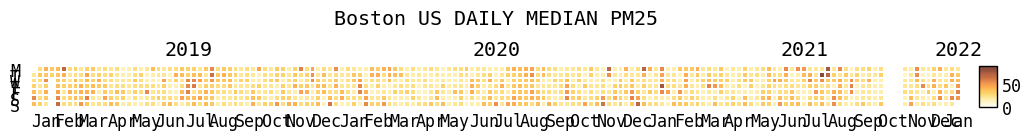

/opt/conda/lib/python3.7/site-packages/july/helpers.py:31: RuntimeWarning: invalid value encountered in multiply
  grid = np.nan * grid if dtype == "float64" else grid


<Figure size 1800x600 with 0 Axes>

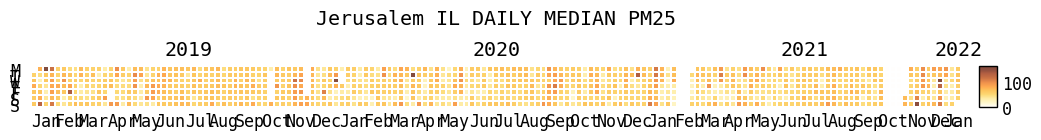

<Figure size 1800x600 with 0 Axes>

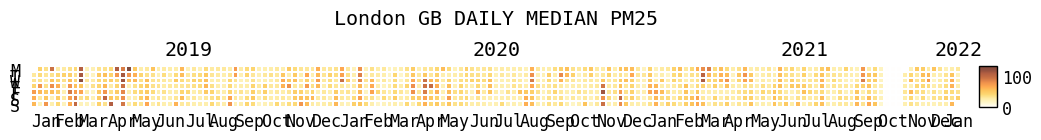

<Figure size 1800x600 with 0 Axes>

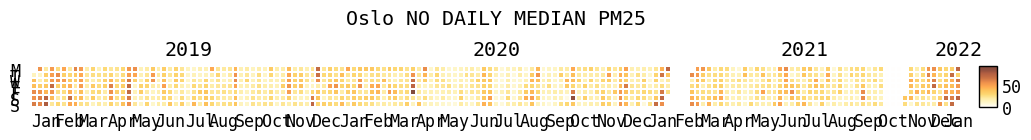

/opt/conda/lib/python3.7/site-packages/july/helpers.py:31: RuntimeWarning: invalid value encountered in multiply
  grid = np.nan * grid if dtype == "float64" else grid


<Figure size 1800x600 with 0 Axes>

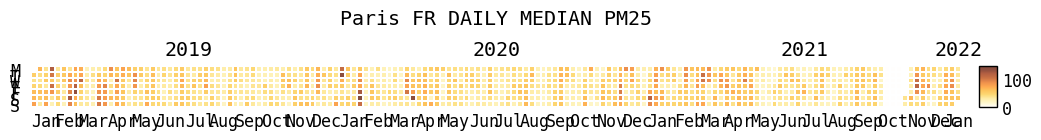

<Figure size 1800x600 with 0 Axes>

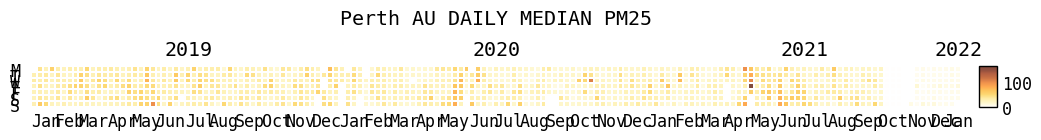

<Figure size 1800x600 with 0 Axes>

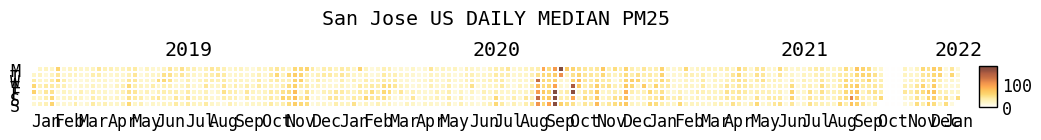

/opt/conda/lib/python3.7/site-packages/july/helpers.py:31: RuntimeWarning: invalid value encountered in multiply
  grid = np.nan * grid if dtype == "float64" else grid


<Figure size 1800x600 with 0 Axes>

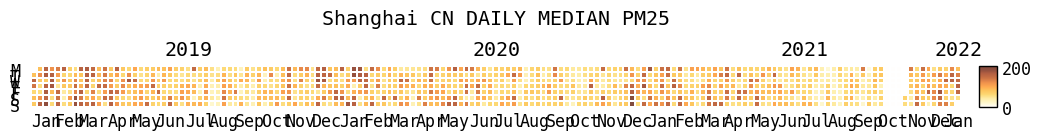

/opt/conda/lib/python3.7/site-packages/july/helpers.py:31: RuntimeWarning: invalid value encountered in multiply
  grid = np.nan * grid if dtype == "float64" else grid


<Figure size 1800x600 with 0 Axes>

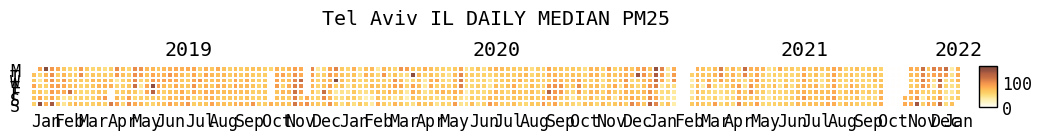

<Figure size 1800x600 with 0 Axes>

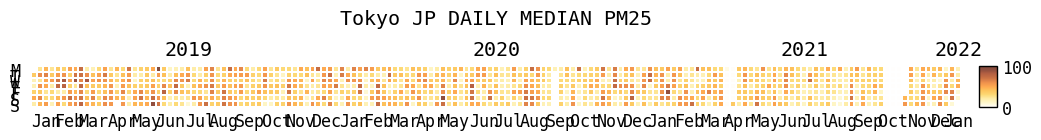

In [13]:
calendar_heatmap()

Next we provide two more summary functions, one for overall comparison, the other for pairwise comparison. They will print out some plots and summaries based on selected measurements/statistics.

In [14]:
# overall comparison summary function
def overall_comparison_summary(data = waqi_data, cities = cities_selected, statistic = 'median', measurement_specie = 'pm25'
                       , start = '2019-01-01', end = '2022-01-01'):
    
    analysis_data = data.loc[[x in list(cities) for x in list(zip(data['City'], data['Country']))]\
                                   & data.Specie.isin([measurement_specie])]\
                                   .groupby(['City', 'Country', 'Date'])
    
    y = analysis_data[statistic].mean().unstack(['City', 'Country']).loc[start:end]
    
    # average rank of cities by chosen statistic of daily measurment
    print('\nAverage rank of cities by DAILY %s %s:\n' % (statistic.upper(), measurement_specie.upper()))
    display(y.rank(axis=1).mean())
    
    # average chosen statistic of daily measurment (unweighted)
    print('\n\nAverage DAILY %s %s:\n' % (statistic.upper(), measurement_specie.upper()))
    display(y.mean())
    
    # average chosen statistic of daily measurment (weighted by daily measurement count)
    print('\n\nAverage DAILY %s %s ((weighted by daily measurement count)):\n' % (statistic.upper(), measurement_specie.upper()))
    w = analysis_data['count'].mean().unstack(['City','Country']).loc[start:end]
    display((w * y).sum() / w.sum())
    
    # distribution (boxen plot) of chosen statistic of daily measurment
    print('\n\nDistribution (boxen plot) of DAILY %s %s:' % (statistic.upper(), measurement_specie.upper()))
    g = sns.catplot(data=y, kind='boxen')\
        .set_axis_labels('City', 'DAILY %s %s'% (statistic.upper(), measurement_specie.upper()))
    g.set_xticklabels(rotation=42)
    print('\n\n')
    
    # time series plot of Daily Median PM2.5
    y.plot(title='Time series of DAILY %s %s:' % (statistic.upper(), measurement_specie.upper()), ylabel='%s %s:' % (statistic.upper(), measurement_specie.upper()))
    
    return None

In [15]:
# pairwise comparison summary function
def pairwise_comparison_summary(data = waqi_data, cities = cities_selected, statistic = 'median', measurement_specie = 'pm25'
                       , start = '2019-01-01', end = '2022-01-01'):
    
    analysis_data = data.loc[[x in list(cities) for x in list(zip(data['City'], data['Country']))]\
                                   & data.Specie.isin([measurement_specie])]\
                                   .groupby(['City', 'Country', 'Date'])
    
    y = analysis_data[statistic].mean().unstack(['City', 'Country']).loc[start:end]
    
    d = y[cities[0]] - y[cities[1]]
    
    #
    print('\nPercentage of time when DAILY %s %s in %s is greater than %s: %.2f\n' % (statistic.upper(), measurement_specie.upper(), *cities, (d>0).mean()))
    print('Percentage of time when DAILY %s %s in %s is equal %s: %.2f\n' % (statistic.upper(), measurement_specie.upper(), *cities, (d==0).mean()))
    print('Percentage of time when DAILY %s %s in %s is less than %s: %.2f\n' % (statistic.upper(), measurement_specie.upper(), *cities, (d<0).mean()))


    
    # distribution (boxen plot) of difference in chosen statistic of daily measurment
    print('\nDistribution (boxen plot) of difference in DAILY %s %s between %s and %s:' % (statistic.upper(), measurement_specie.upper(), cities[0], cities[1]))
    g = sns.catplot(data=d.to_frame(), kind='boxen')\
        .set_axis_labels('%s - %s' % (cities[0], cities[1]), 'difference in %s' % measurement_specie.upper())
    g.set_xticklabels(rotation=30)

    
    # time series plot of Daily Median PM2.5
    plt.figure()
    ax = d.plot(xlabel=' ', ylabel='difference in %s' % measurement_specie.upper(), title='difference in DAILY %s %s between %s and %s' % (statistic.upper(), measurement_specie.upper(), *cities))
    ax.axhline(y=d.mean(), xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
    ax.axhline(y=0, xmin=-1, xmax=1, color='k', linestyle='-', lw=1)
    
    return None

## Daily Median PM2.5


Average rank of cities by DAILY MEDIAN PM25:



City       Country
Boston     US         3.332866
Jerusalem  IL         7.283109
London     GB         4.892924
Oslo       NO         3.188634
Paris      FR         5.858077
Perth      AU         3.433816
San Jose   US         3.947442
Shanghai   CN         8.823529
Tel Aviv   IL         8.697318
Tokyo      JP         5.017387
dtype: float64



Average DAILY MEDIAN PM25:



City       Country
Boston     US         27.956116
Jerusalem  IL         57.733205
London     GB         38.536313
Oslo       NO         27.655205
Paris      FR         45.064426
Perth      AU         28.795169
San Jose   US         32.784186
Shanghai   CN         86.574230
Tel Aviv   IL         68.637931
Tokyo      JP         38.581767
dtype: float64



Average DAILY MEDIAN PM25 ((weighted by daily measurement count)):



City       Country
Boston     US         28.505544
Jerusalem  IL         58.330794
London     GB         38.982848
Oslo       NO         27.743177
Paris      FR         45.063283
Perth      AU         28.615248
San Jose   US         33.627676
Shanghai   CN         86.295881
Tel Aviv   IL         68.804874
Tokyo      JP         39.189481
dtype: float64



Distribution (boxen plot) of DAILY MEDIAN PM25:





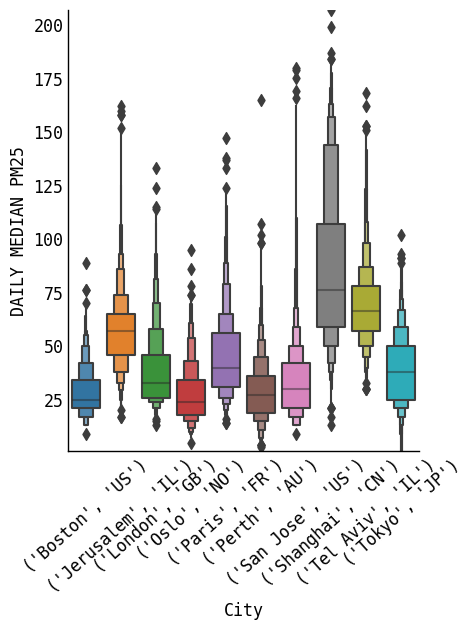

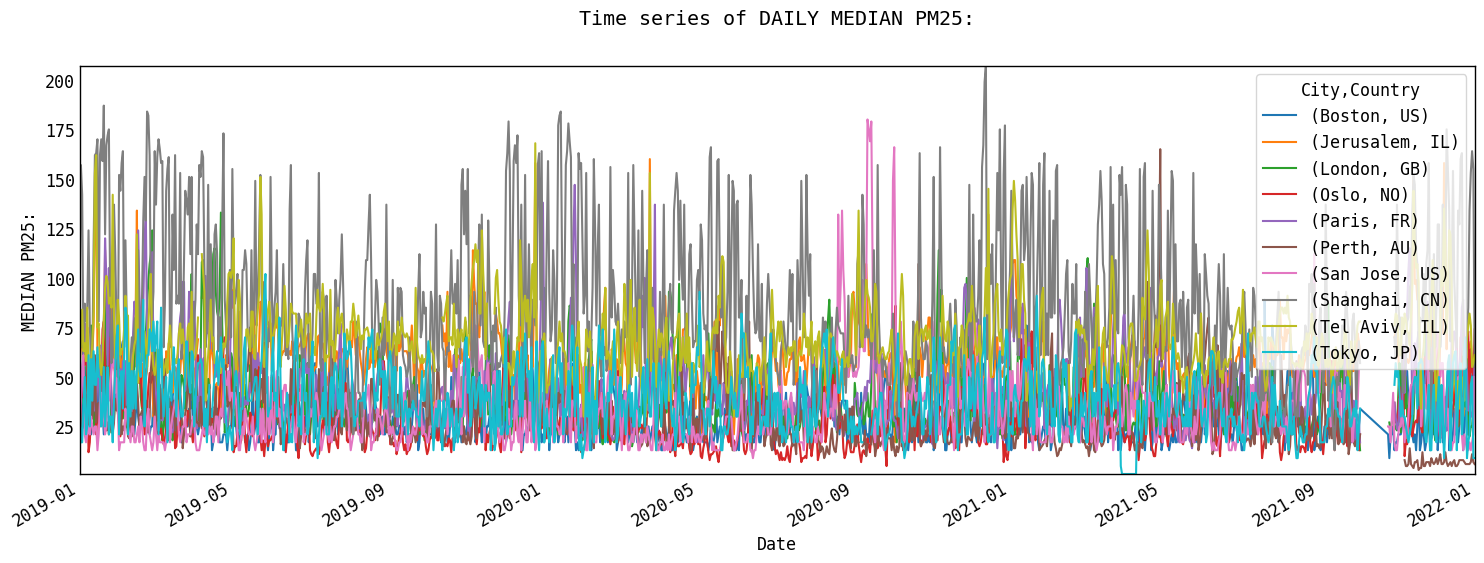

In [16]:
overall_comparison_summary()

## Daily Min PM2.5


Average rank of cities by DAILY MIN PM25:



City       Country
Boston     US         5.600373
Jerusalem  IL         7.287428
London     GB         4.110335
Oslo       NO         2.558739
Paris      FR         6.604575
Perth      AU         7.676329
San Jose   US         5.761860
Shanghai   CN         7.729225
Tel Aviv   IL         4.849138
Tokyo      JP         2.306391
dtype: float64



Average DAILY MIN PM25:



City       Country
Boston     US          6.849673
Jerusalem  IL         17.917466
London     GB          5.885475
Oslo       NO          2.846227
Paris      FR         14.362278
Perth      AU         16.320773
San Jose   US          7.836279
Shanghai   CN         25.394024
Tel Aviv   IL          7.362069
Tokyo      JP          2.073308
dtype: float64



Average DAILY MIN PM25 ((weighted by daily measurement count)):



City       Country
Boston     US          6.936307
Jerusalem  IL         17.535364
London     GB          5.974034
Oslo       NO          2.806030
Paris      FR         14.329317
Perth      AU         15.827154
San Jose   US          8.023236
Shanghai   CN         24.837174
Tel Aviv   IL          7.282132
Tokyo      JP          2.096646
dtype: float64



Distribution (boxen plot) of DAILY MIN PM25:





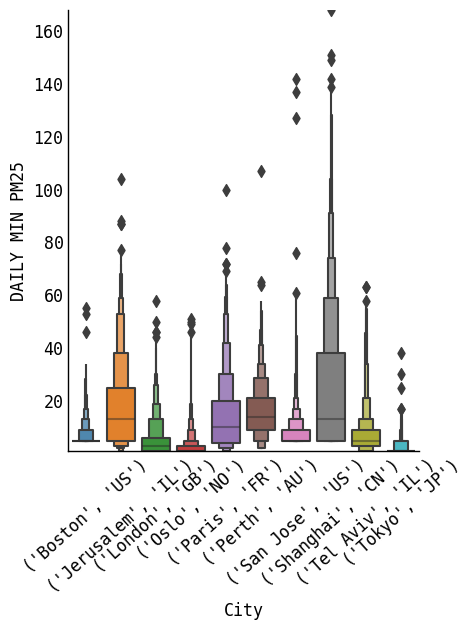

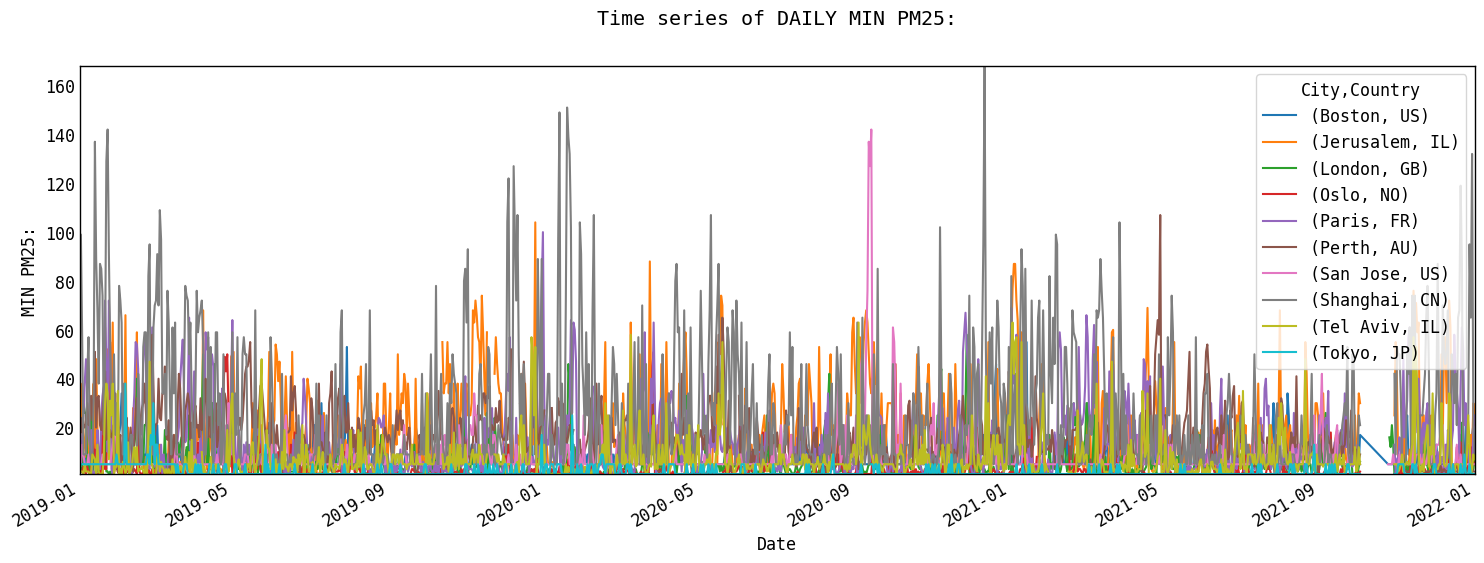

In [17]:
overall_comparison_summary(statistic='min')

## Daily Max PM2.5


Average rank of cities by DAILY MAX PM25:



City       Country
Boston     US         2.783847
Jerusalem  IL         6.888676
London     GB         5.793296
Oslo       NO         4.378223
Paris      FR         5.013539
Perth      AU         1.631884
San Jose   US         3.772093
Shanghai   CN         8.233894
Tel Aviv   IL         8.946839
Tokyo      JP         7.005639
dtype: float64



Average DAILY MAX PM25:



City       Country
Boston     US          63.783380
Jerusalem  IL         146.031670
London     GB         114.753259
Oslo       NO          90.821394
Paris      FR          94.902894
Perth      AU          46.662802
San Jose   US          78.504186
Shanghai   CN         181.003735
Tel Aviv   IL         199.280651
Tokyo      JP         137.593985
dtype: float64



Average DAILY MAX PM25 ((weighted by daily measurement count)):



City       Country
Boston     US          64.385270
Jerusalem  IL         145.118029
London     GB         115.320455
Oslo       NO          91.490959
Paris      FR          95.555816
Perth      AU          47.358445
San Jose   US          79.509492
Shanghai   CN         181.293812
Tel Aviv   IL         200.648692
Tokyo      JP         138.212661
dtype: float64



Distribution (boxen plot) of DAILY MAX PM25:





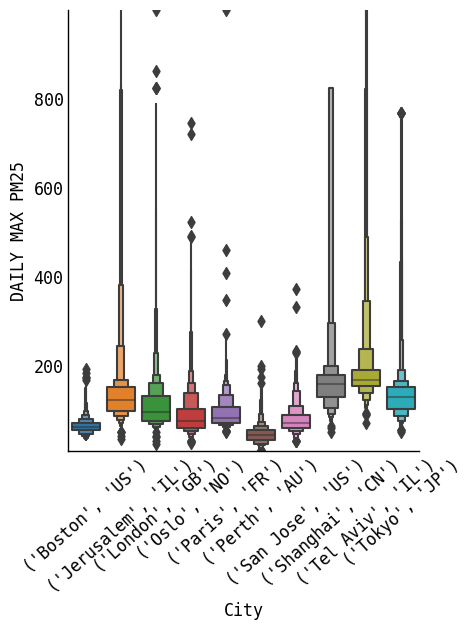

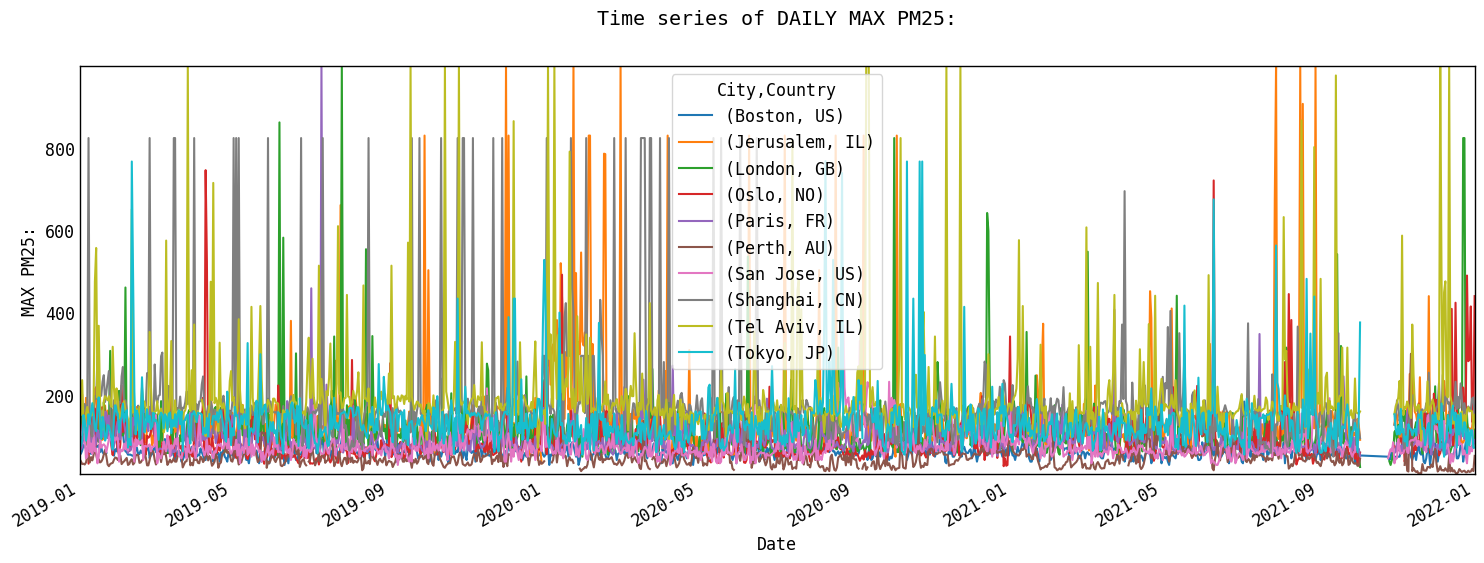

In [18]:
overall_comparison_summary(statistic='max')

## Daily Variance PM2.5


Average rank of cities by DAILY VARIANCE PM25:



City       Country
Boston     US         3.548086
Jerusalem  IL         7.547985
London     GB         5.080074
Oslo       NO         4.702961
Paris      FR         5.096172
Perth      AU         2.048309
San Jose   US         4.855814
Shanghai   CN         7.239963
Tel Aviv   IL         9.077586
Tokyo      JP         5.280075
dtype: float64



Average DAILY VARIANCE PM25:



City       Country
Boston     US          1616.595107
Jerusalem  IL         10329.520259
London     GB          2721.268473
Oslo       NO          2769.192120
Paris      FR          2424.958833
Perth      AU          1086.849092
San Jose   US          2632.192921
Shanghai   CN          6488.447488
Tel Aviv   IL          8891.016034
Tokyo      JP          2547.642397
dtype: float64



Average DAILY VARIANCE PM25 ((weighted by daily measurement count)):



City       Country
Boston     US         1632.198125
Jerusalem  IL         9650.906134
London     GB         2746.426686
Oslo       NO         2726.032613
Paris      FR         2408.925000
Perth      AU         1153.487599
San Jose   US         2694.011270
Shanghai   CN         6361.712330
Tel Aviv   IL         8709.655663
Tokyo      JP         2550.916143
dtype: float64



Distribution (boxen plot) of DAILY VARIANCE PM25:





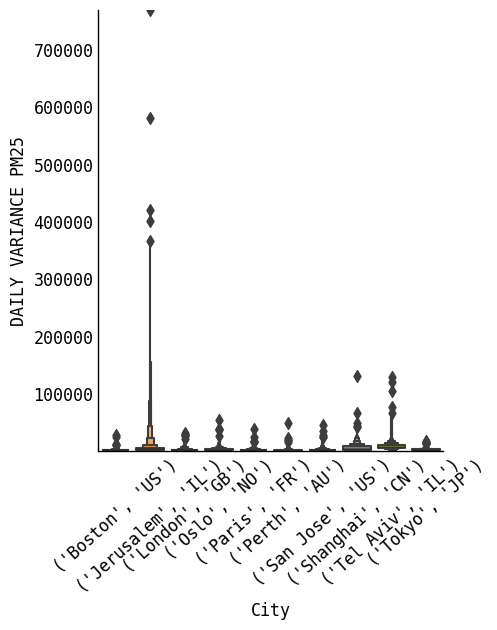

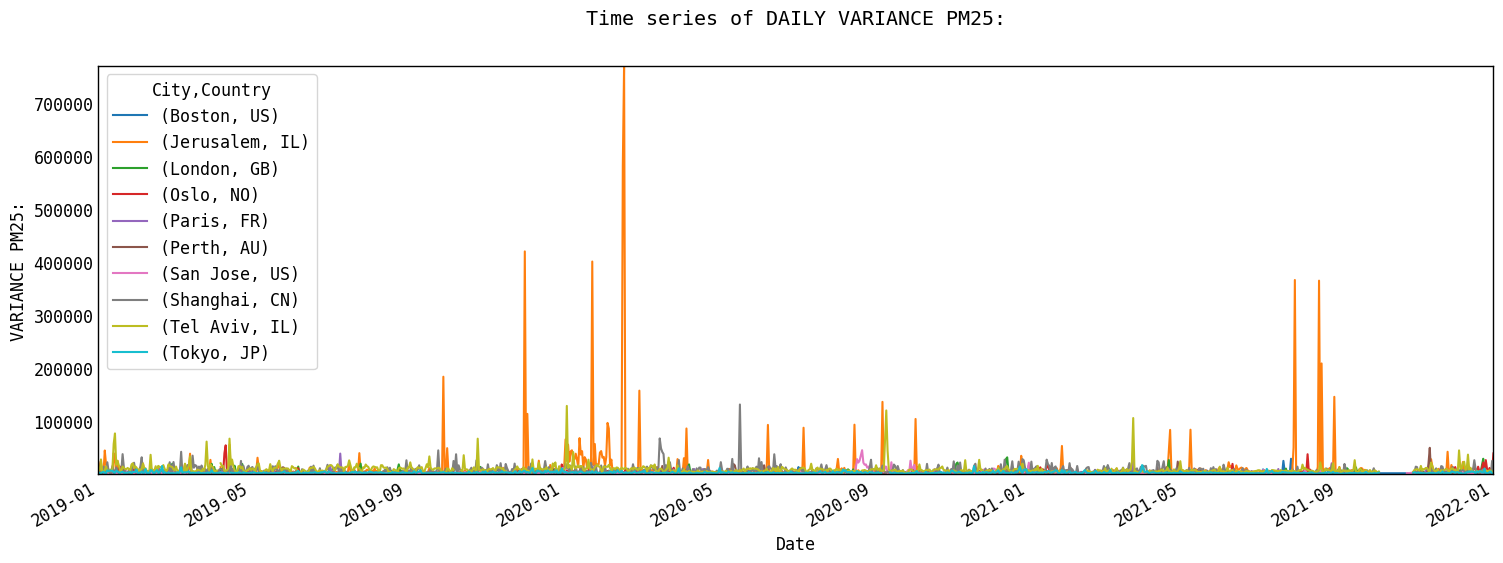

In [19]:
overall_comparison_summary(statistic='variance')

## Pairwise Comparison


Average rank of cities by DAILY MEDIAN PM25:



City      Country
San Jose  US         1.381395
Tokyo     JP         1.613722
dtype: float64



Average DAILY MEDIAN PM25:



City      Country
San Jose  US         32.784186
Tokyo     JP         38.581767
dtype: float64



Average DAILY MEDIAN PM25 ((weighted by daily measurement count)):



City      Country
San Jose  US         33.627676
Tokyo     JP         39.189481
dtype: float64



Distribution (boxen plot) of DAILY MEDIAN PM25:





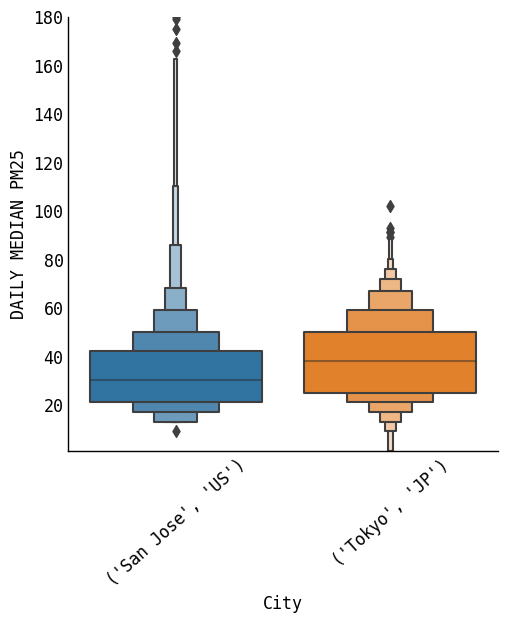

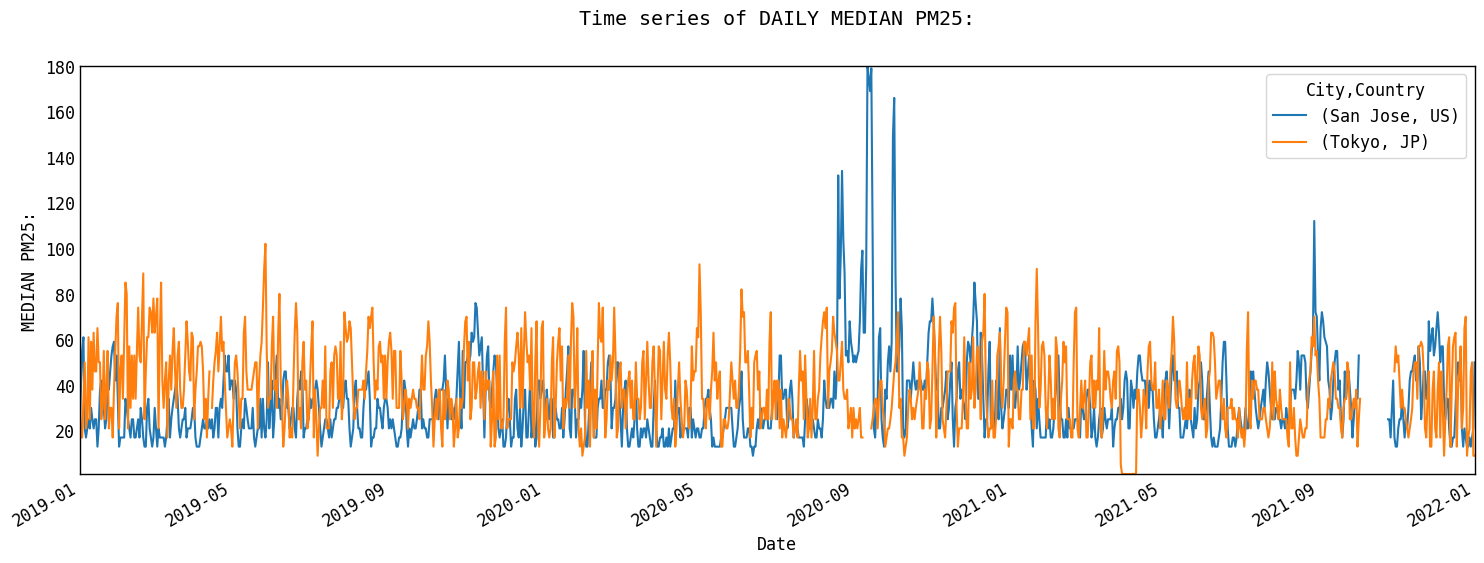

In [20]:
overall_comparison_summary(cities = [('San Jose', 'US'), ('Tokyo', 'JP')], statistic = 'median')

<Figure size 1800x600 with 0 Axes>

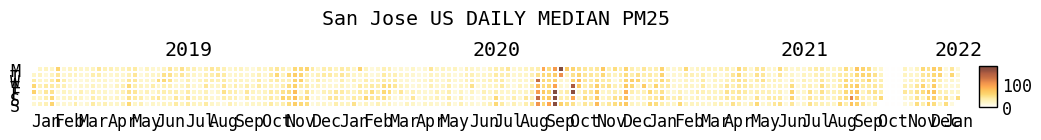

<Figure size 1800x600 with 0 Axes>

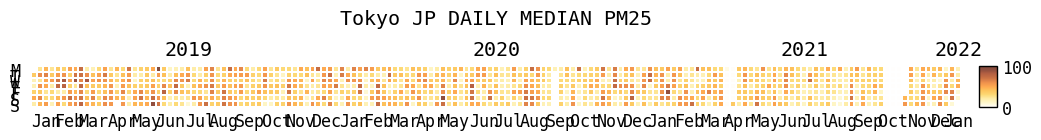

In [21]:
calendar_heatmap(cities = [('San Jose', 'US'), ('Tokyo', 'JP')], statistic = 'median')


Percentage of time when DAILY MEDIAN PM25 in ('San Jose', 'US') is greater than ('Tokyo', 'JP'): 0.35

Percentage of time when DAILY MEDIAN PM25 in ('San Jose', 'US') is equal ('Tokyo', 'JP'): 0.07

Percentage of time when DAILY MEDIAN PM25 in ('San Jose', 'US') is less than ('Tokyo', 'JP'): 0.57


Distribution (boxen plot) of difference in DAILY MEDIAN PM25 between ('San Jose', 'US') and ('Tokyo', 'JP'):


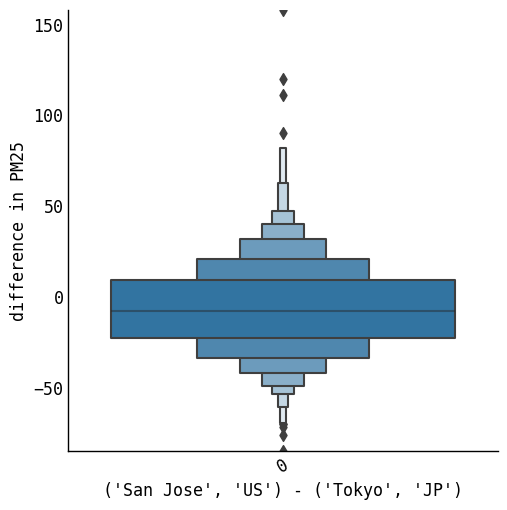

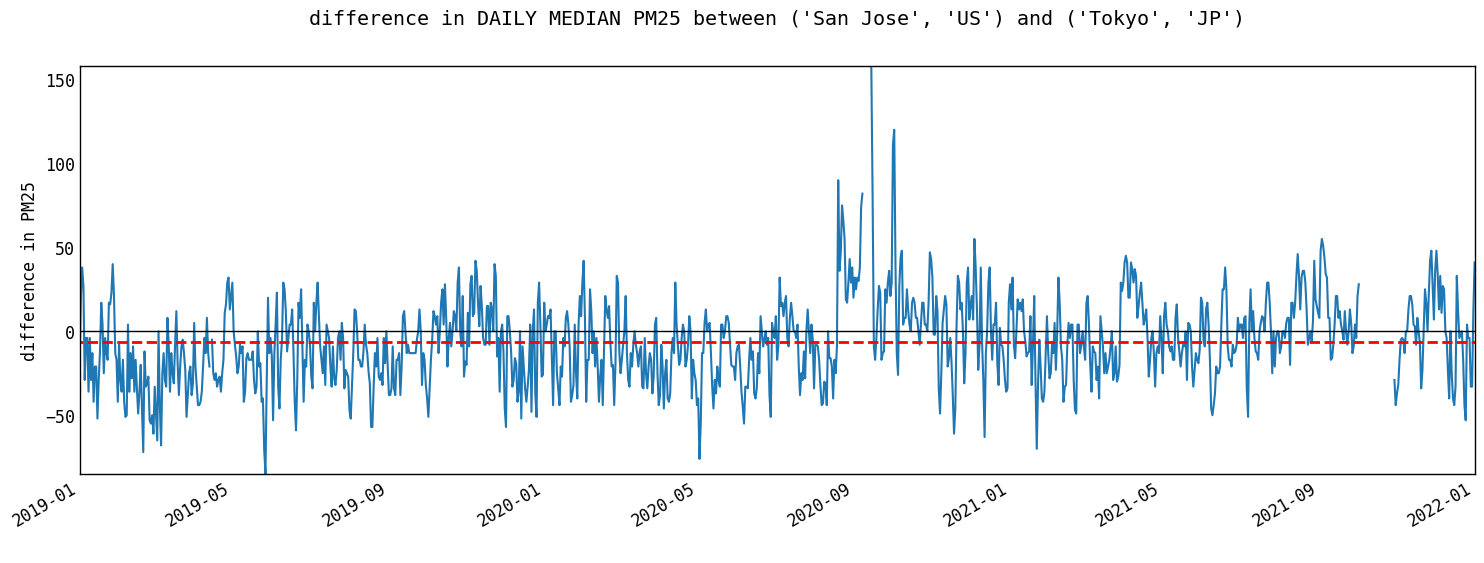

In [22]:
pairwise_comparison_summary(cities = [('San Jose', 'US'), ('Tokyo', 'JP')], statistic = 'median', measurement_specie = 'pm25')

# Conclusion

As shown above, the comparisons of air quality between the cities across the globe actually exibit a somewhat more complicated picture than people often thought. For example, in terms of Daily Min PM2.5, people who live in Tokyo seem to enjoy cleaner air than those in San Jose. But in terms of Daily Median PM2.5, we probably can say the opposite. So what air quality pollutant species and statistics are most important to you? And for which cities are the comparisons of most interest to you? Experiment with the data and code above and have fun.